Ejercicio 2

Mean Resistance: 27.24642857142857
Standard Deviation: 1.4304435784639782
94% Intervalo de confianza para la desviación estándar: (26.879344447464373, 27.613512695392767)
T-Statistic: 11.752111281692764, P-Value: 1.2583475509185974e-16
Rechazo de la hipótesis nula: El promedio es diferente a 25kg por mucho.
98% Intervalo de confianza para la desviación estándar: (1.1694265785507387, 1.8309367105131584)


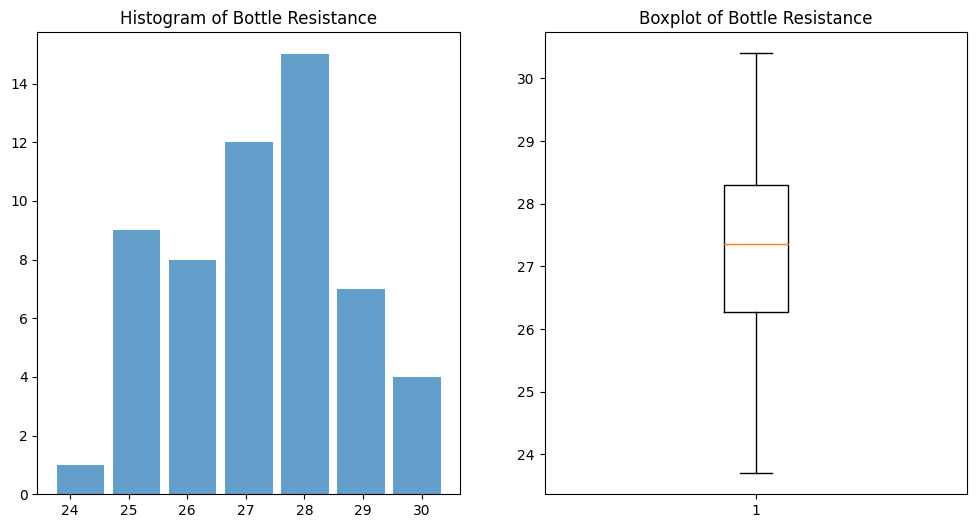

In [12]:
import scipy.stats as stats
resistance_data = [
    28.3, 26.8, 26.6, 26.5, 28.1, 24.8, 27.4, 26.2, 29.4, 28.6, 24.9, 25.2, 30.4, 27.7, 27.0, 26.1, 28.1,
    26.9, 28.0, 27.6, 25.6, 29.5, 27.6, 27.3, 26.2, 27.7, 27.2, 25.9, 26.5, 28.3, 26.5, 29.1, 23.7, 29.7,
    26.8, 29.5, 28.4, 26.3, 28.1, 28.7, 27.0, 25.5, 26.9, 27.2, 27.6, 25.5, 28.3, 27.4, 28.8, 25.0, 25.3,
    27.7, 25.2, 28.6, 27.9, 28.7
]

resistance = np.array(resistance_data)

# Estadística descriptiva
mean_resistance = np.mean(resistance)
std_dev_resistance = np.std(resistance, ddof=1)
print(f"Mean Resistance: {mean_resistance}")
print(f"Standard Deviation: {std_dev_resistance}")

# Intervalo de confianza (94%)
conf_interval_mean = stats.t.interval(0.94, len(resistance) - 1, loc=mean_resistance, scale=std_dev_resistance/np.sqrt(len(resistance)))
print(f"94% Intervalo de confianza para la desviación estándar: {conf_interval_mean}")

# Hypothesis testing 25
t_stat, p_value = stats.ttest_1samp(resistance, 25)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.06:
    print("Rechazo de la hipótesis nula: El promedio es diferente a 25kg por mucho.")
else:
    print("Fallamos en el rechazo de la hipótesis nula: El promedio no es diferente a 25kg por mucho.")

# Intervalo de confianza para la desviación standard (98%)
chi2_upper = stats.chi2.ppf(0.99, df=len(resistance)-1)
chi2_lower = stats.chi2.ppf(0.01, df=len(resistance)-1)
conf_interval_std = (
    np.sqrt((len(resistance)-1) * std_dev_resistance**2 / chi2_upper),
    np.sqrt((len(resistance)-1) * std_dev_resistance**2 / chi2_lower)
)
print(f"98% Intervalo de confianza para la desviación estándar: {conf_interval_std}")

# Histogram & Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(resistance, bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Bottle Resistance')

plt.subplot(1, 2, 2)
plt.boxplot(resistance)
plt.title('Boxplot of Bottle Resistance')

plt.show()


Ejercicio 3

In [15]:
import numpy as np
import scipy.stats as stats

temp_mujeres = np.array([75, 77, 78, 79, 77, 73, 78, 79, 78, 80])
temp_hombres = np.array([74, 72, 77, 76, 76, 73, 75, 73, 74, 75])

# ¿Las muestras son dependientes o independientes?
# Las muestras parecen ser independientes ya que no hay señal de que las preferencias de temperatura de las mujeres estén emparejadas con las de los hombres.

# Prueba de hipótesis para medias iguales
t_stat, p_valor = stats.ttest_ind(temp_mujeres, temp_hombres)
print(f"Estadístico T: {t_stat}, Valor P: {p_valor}")
if p_valor < 0.05:
    print("Rechazar la hipótesis nula: La temperatura media confortable es significativamente diferente entre hombres y mujeres.")
else:
    print("No se rechaza la hipótesis nula: No hay una diferencia significativa en la temperatura media confortable entre hombres y mujeres.")

# Prueba de variabilidad (F-test)
f_stat, p_valor = stats.levene(temp_mujeres, temp_hombres)
print(f"Estadístico F: {f_stat}, Valor P: {p_valor}")
if p_valor < 0.05:
    print("Rechazar la hipótesis nula: Las varianzas son significativamente diferentes.")
else:
    print("No se rechaza la hipótesis nula: Las varianzas no son significativamente diferentes.")



Estadístico T: 3.5254179083580253, Valor P: 0.0024163922940833725
Rechazar la hipótesis nula: La temperatura media confortable es significativamente diferente entre hombres y mujeres.
Estadístico F: 0.032142857142857056, Valor P: 0.8597171607575279
No se rechaza la hipótesis nula: Las varianzas no son significativamente diferentes.


In [16]:
import numpy as np
import scipy.stats as stats

metodo_actual = np.array([1.88, 1.84, 1.83, 1.90, 2.19, 1.89, 2.27, 2.03, 1.96, 1.98, 2.00, 1.92, 1.83, 1.94, 1.94, 1.95, 1.93, 2.01])
metodo_nuevo = np.array([1.87, 1.90, 1.85, 1.88, 2.18, 1.87, 2.23, 1.97, 2.00, 1.98, 1.99, 1.89, 1.78, 1.92, 2.02, 2.00, 1.95, 2.05])

# ¿Las muestras son dependientes o independientes?
# Las muestras son dependientes porque cada par de mediciones proviene del mismo disco.

# Prueba de hipótesis para medias iguales usando prueba T apareada
t_stat, p_valor = stats.ttest_rel(metodo_actual, metodo_nuevo)
print(f"Estadístico T: {t_stat}, Valor P: {p_valor}")
if p_valor < 0.05:
    print("Rechazar la hipótesis nula: El nuevo método produce resultados significativamente diferentes en comparación con el método actual.")
else:
    print("No se rechaza la hipótesis nula: El nuevo método no produce resultados significativamente diferentes en comparación con el método actual.")

# Recomendación
if p_valor > 0.05:
    print("Recomendación: Adoptar el nuevo método ya que reduce el tiempo de prueba y no difiere significativamente en precisión.")
else:
    print("Recomendación: No adoptar el nuevo método ya que produce resultados significativamente diferentes.")



Estadístico T: -0.2387449722549875, Valor P: 0.8141576311659825
No se rechaza la hipótesis nula: El nuevo método no produce resultados significativamente diferentes en comparación con el método actual.
Recomendación: Adoptar el nuevo método ya que reduce el tiempo de prueba y no difiere significativamente en precisión.
